# Task 1 : Regularization

In [1]:
#import required libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# run the file containing all necessary functions 

%run ../Functions.ipynb

In [3]:
# laod the input file

np_path_XYs = np.genfromtxt(r"D:\Om Saran\ML\adobe\problems\problems\isolated.csv",delimiter = ',')

In [4]:
np.unique(np_path_XYs[:,0])

array([0., 1., 2.])

In [5]:
# find the no of polylibe curves present in input shape

size = len(np.unique(np_path_XYs[:,0]))
size

3

In [6]:
# store the curves in a list XY[]

XY = []
for i in range(size):
    new_path = np_path_XYs[np_path_XYs[:,0] == i][:,2:]
    XY.append(new_path)
len(XY)

3

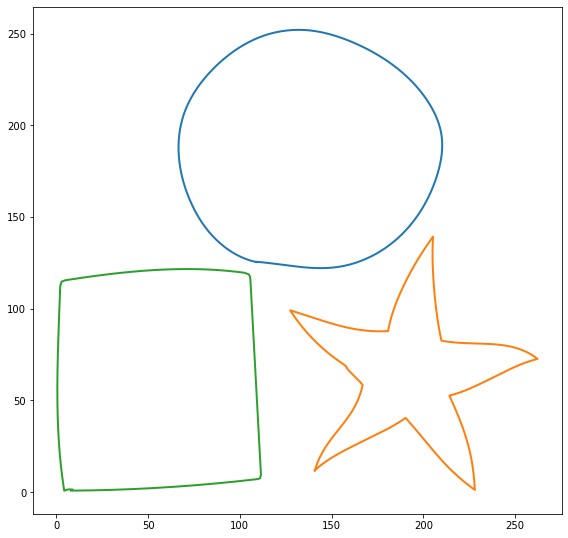

In [7]:
# plot the input shape

fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
for i in range(size):
    ax.plot (XY[i][:, 0], XY[i][:, 1], linewidth =2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()     

In [8]:
# split at points where the curvature is high, denoting possible point for start or end of new curve.

cur = len(XY)
XY = split_all_curves_by_curvature(XY)
while len(XY) != cur:
    cur = len(XY)
    XY = split_all_curves_by_curvature(XY)

In [9]:
# new size after splitting

size = len(XY)
size

20

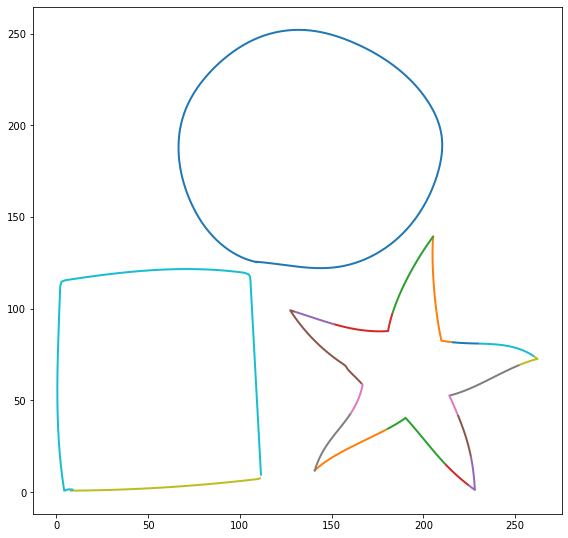

In [10]:
# plot the input after splitting at break points

fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
for i in range(size):
    ax.plot (XY[i][:, 0], XY[i][:, 1], linewidth =2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
        

In [11]:
# make necessary variables to convert the drawing into a graph to detect all possible open and closed curves.

size = len(XY)
start_points = []
end_points = []

for i in range(size):
    a = XY[i][0]
    b = XY[i][len(XY[i])-1]
    start_points.append(a);
    end_points.append(b);

curve_num = {}
for i in range(2*size):
    curve_num[i] = i//2

partner = {}
for i in range(0,2*size,2):
    partner[i] = i+1
for i in range(1,2*size,2):
    partner[i] = i-1
    
umap = {}
for i in range(size):
    umap[2*i] = start_points[i]
    umap[2*i +1] = end_points[i]

num_curves = size
# Initialize adjacency list with curve info
adjacency_list = [[] for _ in range(2 * num_curves)]  # 20 nodes for 10 curves

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Build the adjacency list
for i in range(num_curves):
    # Connect each curve's start and end points to each other
    adjacency_list[2 * i].append((2 * i + 1, i))  # Connect start to end
    adjacency_list[2 * i + 1].append((2 * i, i))  # Connect end to start

    for j in range(num_curves):
        if i != j:
            # Check distances for start points
            if euclidean_distance(start_points[i], start_points[j]) < 5:
                adjacency_list[2 * i].append((2 * j, j))
            if euclidean_distance(start_points[i], end_points[j]) < 5:
                adjacency_list[2 * i].append((2 * j + 1, j))
            # Check distances for end points
            if euclidean_distance(end_points[i], start_points[j]) < 5:
                adjacency_list[2 * i + 1].append((2 * j, j))
            if euclidean_distance(end_points[i], end_points[j]) < 5:
                adjacency_list[2 * i + 1].append((2 * j + 1, j))

In [12]:
to_print = []

In [13]:
# find all the open curves present in the shape

num_nodes = len(adjacency_list)
open_curves = find_open_curves(adjacency_list, num_nodes,umap)

In [14]:
len(open_curves)

0

In [15]:
#plot all the open curves

for i, (curve_set, path) in enumerate(open_curves.items()):
    fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
    for el in curve_set:
        ax.plot (XY[el][:, 0], XY[el][:, 1], linewidth =2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [38]:
# Load the model for classifying closed curves

from joblib import dump, load
model_open = load('../Models/model_open.joblib')

In [17]:
# Step 1: Collect all indices that need to be removed, since curves that are already a part of s
rem_ind1 = set()

In [18]:
# reconstruct all possible straight lines from open curves and use the model to classify and regularize and save straight lines

for curve_set, node_sequence in open_curves.items():
    new_path = reconstruct_single_curve(node_sequence,umap,XY,partner)
    fv = extract_features(new_path)
    fv = fv.reshape(1, -1)
    shape = model_open.predict(fv)
    print(shape)
#     print(new_path)
    
    if shape == 'straight':
        rem_ind.update(curve_set)
        print(curve_set)
        to_print.append(curve_set)
        corners = [new_path[0], new_path[len(new_path)-1]]
        corners = np.array(corners) 
        ax.plot (corners[:, 0], corners[:, 1], linewidth =2)  

In [19]:
# Step 2: Filter XY[] by removing the curves whose indices are in the set
XY = [curve for i, curve in enumerate(XY) if i not in rem_ind1]


In [20]:
len(XY)

20

In [21]:
# build the graph again with new XY[] list

size = len(XY)
start_points = []
end_points = []

for i in range(size):
    a = XY[i][0]
    b = XY[i][len(XY[i])-1]
    start_points.append(a);
    end_points.append(b);

curve_num = {}
for i in range(2*size):
    curve_num[i] = i//2

partner = {}
for i in range(0,2*size,2):
    partner[i] = i+1
for i in range(1,2*size,2):
    partner[i] = i-1
    
umap = {}
for i in range(size):
    umap[2*i] = start_points[i]
    umap[2*i +1] = end_points[i]

num_curves = size
# Initialize adjacency list with curve info
adjacency_list = [[] for _ in range(2 * num_curves)]  # 20 nodes for 10 curves

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Build the adjacency list
for i in range(num_curves):
    # Connect each curve's start and end points to each other
    adjacency_list[2 * i].append((2 * i + 1, i))  # Connect start to end
    adjacency_list[2 * i + 1].append((2 * i, i))  # Connect end to start

    for j in range(num_curves):
        if i != j:
            # Check distances for start points
            if euclidean_distance(start_points[i], start_points[j]) < 5:
                adjacency_list[2 * i].append((2 * j, j))
            if euclidean_distance(start_points[i], end_points[j]) < 5:
                adjacency_list[2 * i].append((2 * j + 1, j))
            # Check distances for end points
            if euclidean_distance(end_points[i], start_points[j]) < 5:
                adjacency_list[2 * i + 1].append((2 * j, j))
            if euclidean_distance(end_points[i], end_points[j]) < 5:
                adjacency_list[2 * i + 1].append((2 * j + 1, j))

In [39]:
# import the model for closed curves classification

from tensorflow.keras.models import load_model
model_closed = load_model('../Models/model_closed.h5')

In [23]:
# find all the closed curves

# Number of nodes
num_nodes = len(adjacency_list)

# Find all closed curves
closed_curves = find_closed_curves(adjacency_list, num_nodes)
len(closed_curves)


4

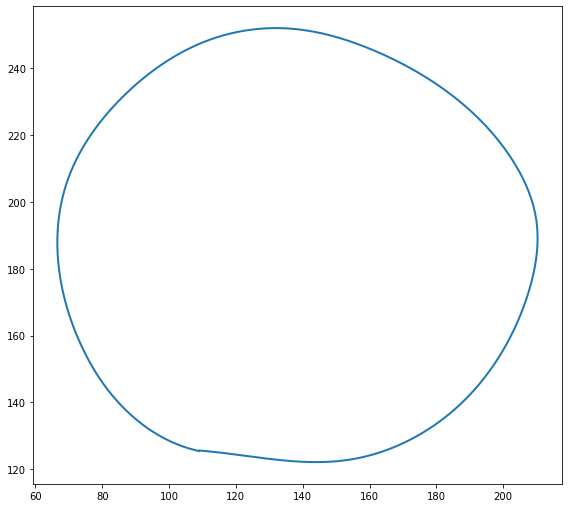

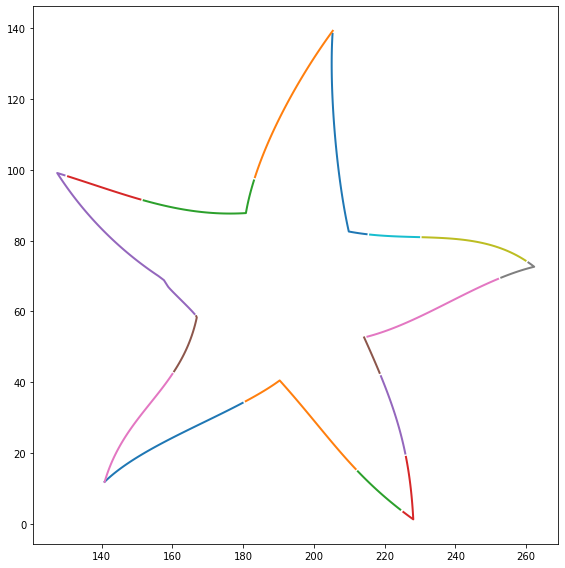

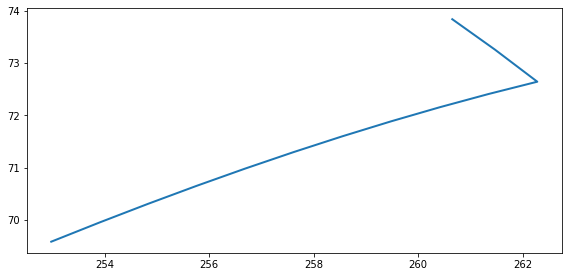

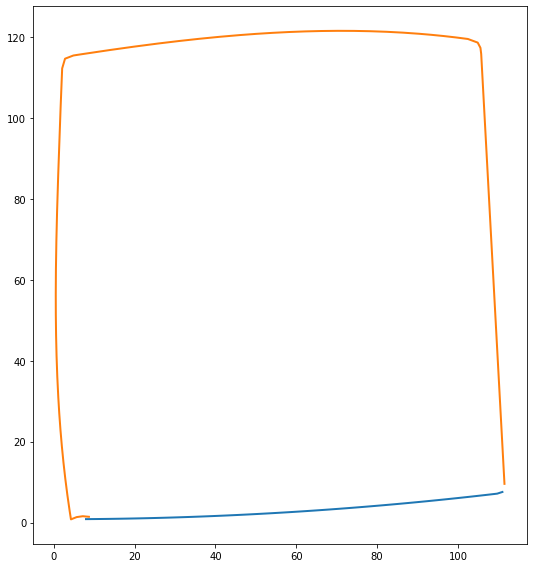

In [24]:
#plot all the closed curves

for i, (curve_set, path) in enumerate(closed_curves.items()):
    fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
    for el in curve_set:
        ax.plot (XY[el][:, 0], XY[el][:, 1], linewidth =2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [25]:
label_map = { 0 : 'circle',  1 : 'ellipse',  2:  'irregular',  3 : 'rectangle', 4: 'regular',  5 : 'star'}

In [26]:
for_sym = []

In [27]:
# reconstruct all possible closed regular curves from open curves and use the model to classify and regularize
# and save regular closed curves

rem_ind2 = set() 

for curve_set, node_sequence in closed_curves.items():
    new_path = reconstruct_single_curve(node_sequence,umap,XY,partner)
    for_sym.append(new_path)
    #print(len(new_path))
    #print(type(new_path))
    #print(type(new_path[0]))
    data = np.array([convert_points_to_image(new_path,224)])
    data = np.stack([data] * 3, axis=-1)
    #print(data.shape)
    out = model_closed.predict(data)
    num = np.argmax(out)
    shape = label_map[num]
    #print(shape)
    #     print(new_path)
    
    if shape == 'rectangle':
        #print(curve_set)
        rem_ind2.update(curve_set)
        corners = find_corners(new_path)
        #print(corners)
        reg_corners = adjust_to_perfect_rectangle(corners)
        reg_corners = np.vstack([reg_corners, reg_corners[0]])
        to_print.append(reg_corners)
        ax.plot(reg_corners[:, 0], reg_corners[:, 1], linewidth =2)
        
    if shape == 'circle':
        rem_ind2.update(curve_set)
        #print(curve_set)
        radius = np.mean(distances_to_centroid(new_path))
        centre = new_path.mean(axis =0)
        points = generate_circle_points(centre, radius)
        points = np.vstack([points,points[0]])
        to_print.append(points)
        ax.plot (points[:, 0], points[:, 1], linewidth =2)
    
    if shape == 'star':
        rem_ind2.update(curve_set)
        #print(curve_set)
        corners = find_corners(new_path)
        corners = np.vstack((corners, corners[0]))
        to_print.append(corners)
        ax.plot (corners[:, 0], corners[:, 1], linewidth =2)
    
    if shape == 'regular':
        #print(curve_set)
        corners = find_corners(new_path)
        corners = remove_close_corners(corners)
#         print(corners)
        centroid = corners.mean(axis =0)
        points = generate_polygon_points_on_circle(corners,centroid)
        if points ==0:
            continue
        rem_ind2.update(curve_set)
        to_print.append(points)
        points = np.vstack((points, corners[0]))
        ax.plot (points[:, 0], points[:, 1], linewidth =2)
#         print(points) 

In [28]:

# Step 2: Filter XY[] by removing the curves whose indices are in the set
XY = [curve for i, curve in enumerate(XY) if i not in rem_ind2]


In [29]:
len(XY)

0

Final Regularized shape :

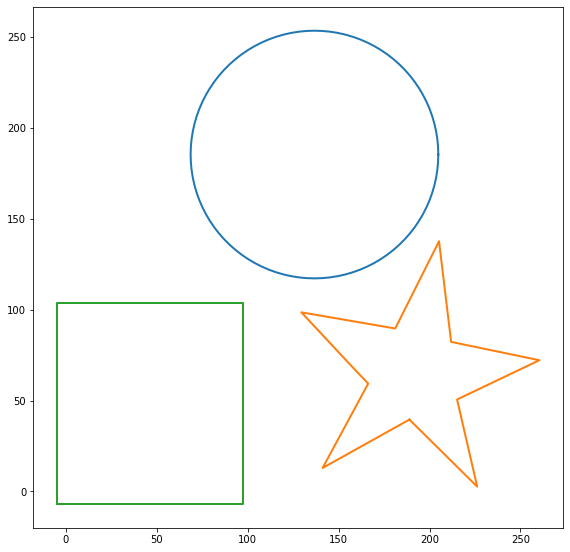

In [30]:
fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
for i in range(len(to_print)):
    ax.plot (to_print[i][:, 0], to_print[i][:, 1], linewidth =2)


for i in range(len(XY)):
    ax.plot (XY[i][:, 0], XY[i][:, 1], linewidth =2)  
    
plt.gca().set_aspect('equal', adjustable='box')
plt.show()     

# Task 2 : Finding Symmetry :

In [31]:
len(closed_curves)

4

In [44]:
model_sym_hor = load_model('../Models/model_sym_hor.h5')

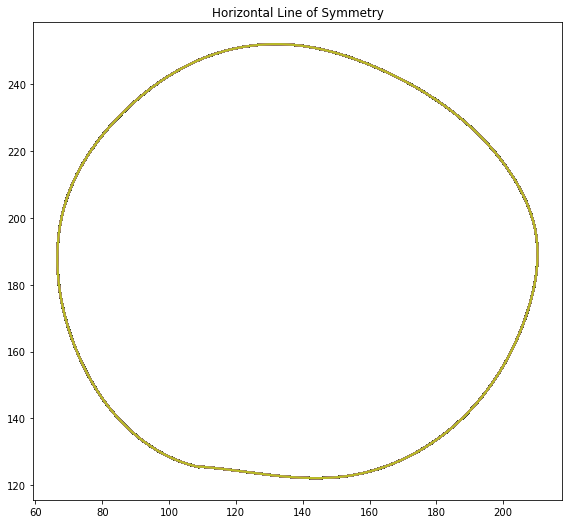

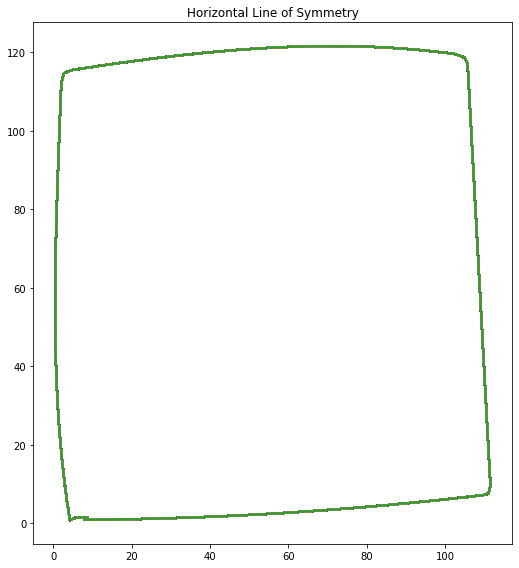

In [45]:
# CLosed shapes with Horizonatal line of symmetry :

for new_path in for_sym:
#     print(new_path)
    data = np.array([convert_points_to_image(new_path,224)])
    data = np.stack([data] * 3, axis=-1)
    #print(data.shape)
    out = model_sym_hor.predict(data)
    num = np.argmax(out)
    if num == 1:
        fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
        for i in range(len(new_path)):
            ax.plot (new_path[:, 0], new_path[:, 1], linewidth =2)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title('Horizontal Line of Symmetry')
        plt.show() 

In [46]:
model_sym_ver = load_model('../Models/model_sym_ver.h5')

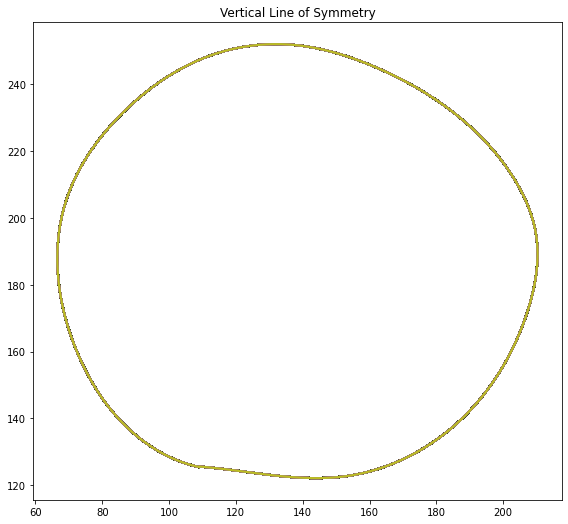

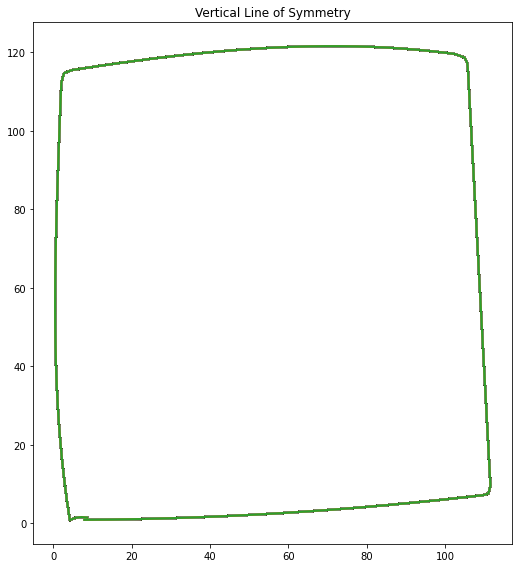

In [47]:
# CLosed shapes with Vertical line of symmetry :

for new_path in for_sym:
#     print(new_path)
    data = np.array([convert_points_to_image(new_path,224)])
    data = np.stack([data] * 3, axis=-1)
    #print(data.shape)
    out = model_sym_ver.predict(data)
    num = np.argmax(out)
    if num == 1:
        fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
        for i in range(len(new_path)):
            ax.plot (new_path[:, 0], new_path[:, 1], linewidth =2)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title('Vertical Line of Symmetry')
        plt.show() 

In [48]:
model_sym_diag = load_model('../Models/model_sym_diag.h5')

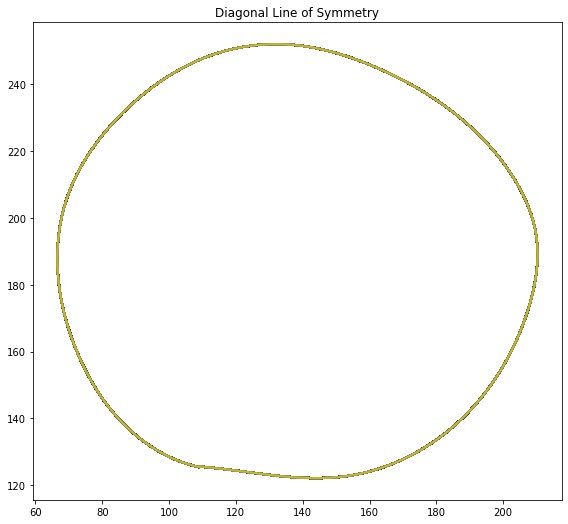

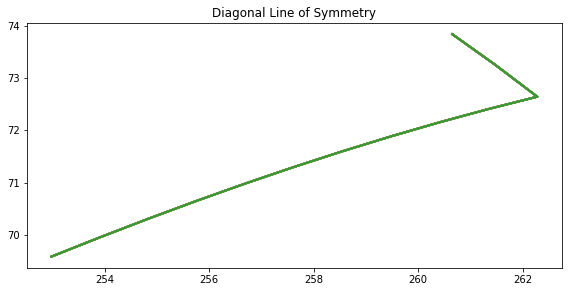

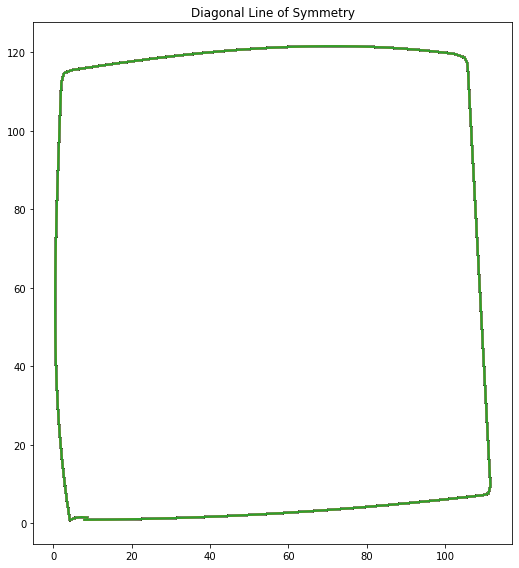

In [49]:
# CLosed shapes with Diagonal line of symmetry :

for new_path in for_sym:
#     print(new_path)
    data = np.array([convert_points_to_image(new_path,224)])
    data = np.stack([data] * 3, axis=-1)
    #print(data.shape)
    out = model_sym_diag.predict(data)
    num = np.argmax(out)
    if num == 1:
        fig , ax = plt . subplots ( tight_layout =True , figsize =(8 , 8))
        for i in range(len(new_path)):
            ax.plot (new_path[:, 0], new_path[:, 1], linewidth =2)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.title('Diagonal Line of Symmetry')
        plt.show() 